# K-NN - Visualizing Decision Boundary

In this notebook, we visualize the decision boundary created by the K-NN model.

The goal is to see how the variation of model complexity (i.e., number of nearest neighbors) changes the **smoothness of decision boundary**. In particular, we will see that
- Smaller K produces intricate decision boundary & the model is less generalizable (test accuracy is low).
- Larger K produces smooth decision boundary & the model is more generalizable (test accuracy is high).
- K = all training data will make same predictions (most numerous class) for all test points. Useless!


In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


# Synthetic Dataset

We will use Scikit-Learn's "datasets.make_moons" function to generate a synthetic non-linear dataset that is suitable for investigating classification (as well as clustering) models. 

The following parameter is used by the make_moons function:

- noise : Standard deviation of Gaussian noise added to the data.

## Load The Data and Visualiize 

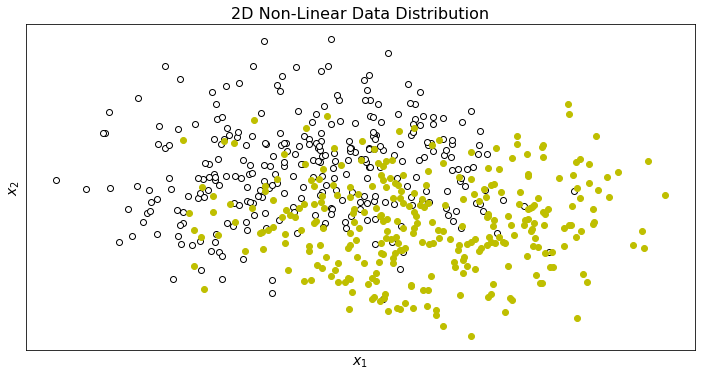

In [2]:
X, y = make_moons(n_samples=600, noise=0.55, random_state=0)

plt.figure(figsize=(12, 6))
plt.plot(X[y.ravel()==0, 0], X[y.ravel()==0, 1], "wo", markeredgecolor="k")
plt.plot(X[y.ravel()==1, 0], X[y.ravel()==1, 1], "yo")

plt.title("2D Non-Linear Data Distribution", fontsize=16)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.xticks(())
plt.yticks(())
plt.show()

# Create Training and Test Dataset

In [3]:
# Spilt the dataset into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(480, 2)
(120, 2)
(480,)
(120,)


## Standardize the Data

In [4]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Function for Plotting Decision Bounday 


To better understand how the K Nearest Neighbors model classifier performs classifiation, we need to **<font color=red size=6> visualize </font>** its decision boundary.


We define the function "decision_boundary_class_colored" to plot the decision boundary. 

In [5]:
def decision_boundary_class_colored(clf, X, plotDistanceFromHyperplane=False, colorBar=False):
    
    # Get the min and max value of feature x1
    x1min, x1max = X[:,0].min() - 0.1, X[:, 0].max() + 0.1
    
    # Get the min and max value of feature x2
    x2min, x2max = X[:,1].min() - 0.1, X[:, 1].max() + 0.1
    
    # Create the mesh grid
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    
    # Create pairs of new points from the grid
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    
    # Compute the class predictions for all new points
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    
    # Generate the contourf plot for the predictions
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.RdGy, alpha=0.99)
    
    
    if(plotDistanceFromHyperplane == True):
    
        # Compute the signed distance of a sample to the hyperplane for all new points
        y_decision = clf.decision_function(X_new).reshape(x1.shape)

        # Generate the contourf plot for the distance of all points from the hyperplane
        plt.contourf(x1, x2, y_decision, cmap=plt.cm.bwr, alpha=0.2)
    
    if(colorBar==True):
        plt.colorbar()    

## K-NN Decision Boundary

We vary the number of nearest neighbors (K) and plot the decision boundary for each model. 

The range of K varies from 1 (only one neighbor) to 480 (all neighbors in the training data).

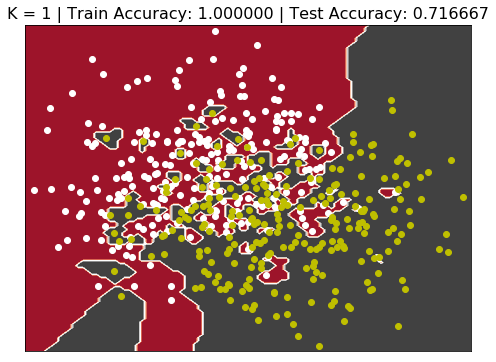

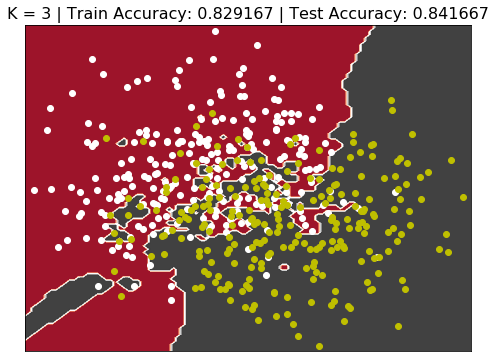

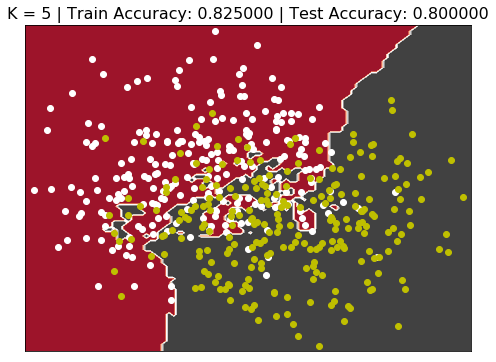

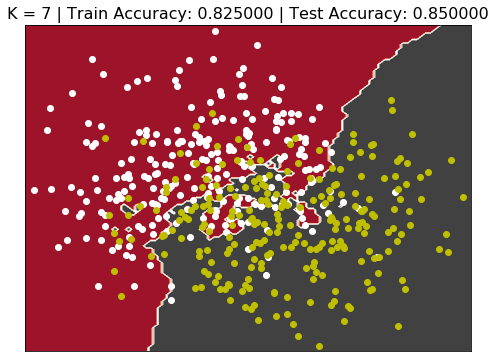

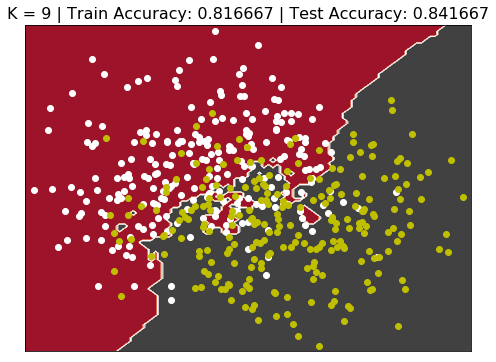

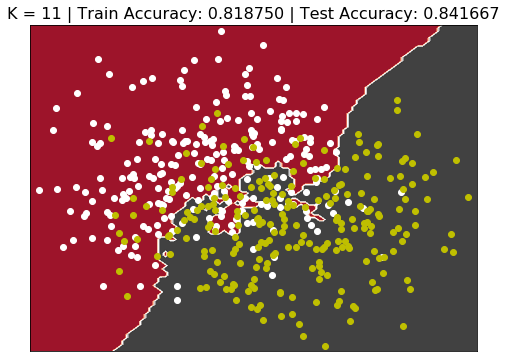

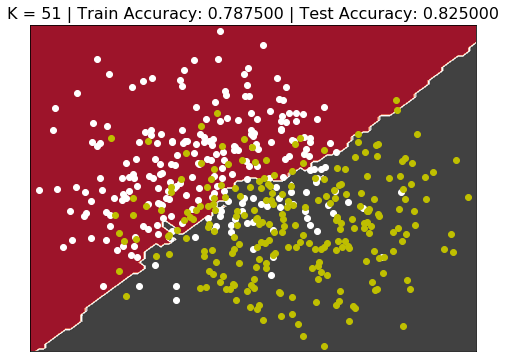

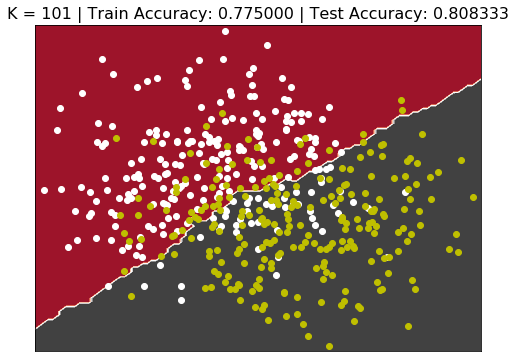

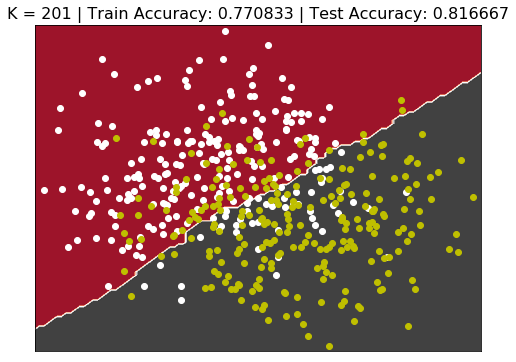

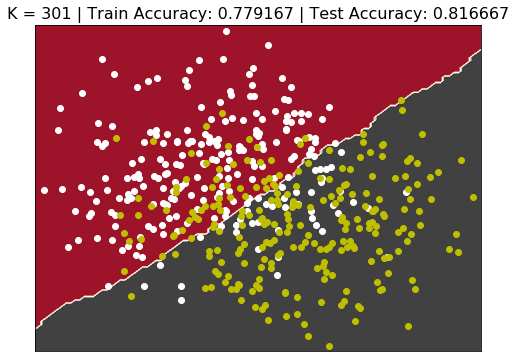

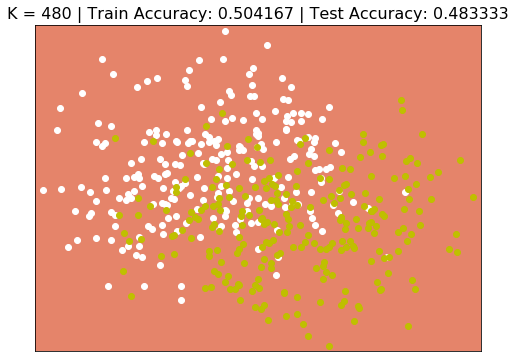

In [6]:
# Set the the range of K 
neighbors = [1, 3, 5, 7, 9, 11, 51, 101, 201, 301, 480]


for i,k in enumerate(neighbors):
    
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy = knn.score(X_test, y_test) 
    
    # Show the decision boundary only on the training data
    plt.figure(figsize=(8,6))
    decision_boundary_class_colored(knn, X_train, plotDistanceFromHyperplane=False)
    plt.plot(X_train[y_train.ravel()==0, 0], X_train[y_train.ravel()==0, 1], "wo")
    plt.plot(X_train[y_train.ravel()==1, 0], X_train[y_train.ravel()==1, 1], "yo")
    plt.title("K = %d | Train Accuracy: %f | Test Accuracy: %f"% 
              (k, train_accuracy, test_accuracy) , fontsize=16)
    plt.xticks(())
    plt.yticks(())



    plt.show()
    
    
    

## Observation: Variation of Decision Boundary

Based on the decision boundaries created by various models, we make following observations:

- K = 1: Training accuracy is the highest, but test accuracy is the lowest (severe overfitting). The decision boundary is very complex and highly non-linear.
- As we increase K, the decision boundary becomes smooth and less complex. The training accuracy decreses but the test accuracy increases. The model becomes more generalizable.
- K = all training data (480): all classifications become the same! The model simply assigns each test data to the most numerous class in the train data. 



For finding optimal K (optimal model) in K-NN, we perform model selection via cross validation.

